EDA 연습문제: 이상치 및 범주형 변수 처리


In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
data_df = pd.read_csv('../../datasets/AdultCensusIncomeForecast_train.csv')
data_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


0. 각 단계 마다 데이터 타입 맞는 시각화 필수 
1. 이상치 탐지 및 처리
age 열에서 이상치를 탐지하기 위한 기준을 설정하세요.
IQR(Interquartile Range) 방법을 사용하여 이상치를 탐지하고, 이상치의 개수를 출력하세요.
이상치를 적절한 방법(예: 제거 또는 대체)으로 처리하세요.

In [98]:
data_df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,workclass_grouped,native_country_grouped,capital_gain_cat
count,30725,32561,32561,30718,32561,32561,32561,31978,30725,31978,32561
unique,8,16,7,14,6,5,2,41,6,6,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,Private,United-States,No Gain
freq,22696,10501,14976,4140,13193,27816,21790,29170,22696,29170,29849


<Axes: xlabel='age'>

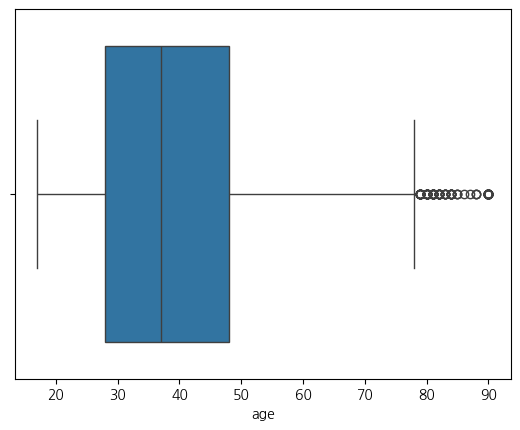

In [58]:
sns.boxplot(data=data_df, x='age')

In [59]:
# age 이상치 조절
Q1 = np.percentile(data_df['age'].dropna(),25)
Q3 = np.percentile(data_df['age'].dropna(),75)
IQR = Q3 - Q1
Q1, Q3, IQR

bound_max = Q3 + 1.5*IQR
bound_min = Q1 - 1.5*IQR
bound_max, bound_min

(78.0, -2.0)

In [60]:
# 방법 2: loc 사용
data_df.loc[data_df['age'] > bound_max, 'age']

74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64

In [61]:
data_df.loc[data_df['age'] > bound_max, 'age'] = bound_max

<Axes: xlabel='age'>

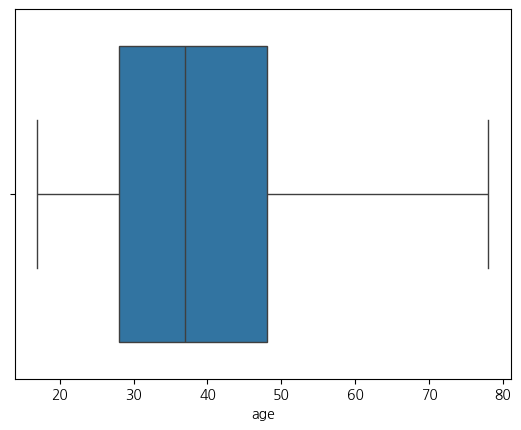

In [77]:
sns.boxplot(data=data_df, x='age')

capital_gain과 capital_loss 열에서 이상치 여부를 탐지하세요.
각 열의 이상치 탐지를 위한 기준을 정의하고 이상치 비율을 출력하세요.
데이터의 분포를 시각화(박스플롯 또는 히스토그램)하여 결과를 확인하세요.

<Axes: xlabel='capital_gain', ylabel='Count'>

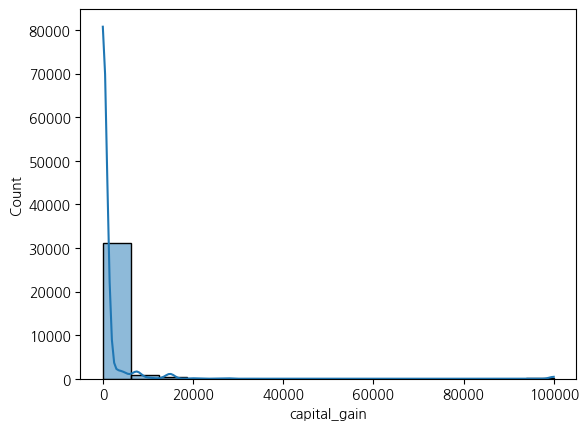

In [62]:
sns.histplot(data=data_df, x='capital_gain', kde=True)

<Axes: xlabel='capital_loss', ylabel='Count'>

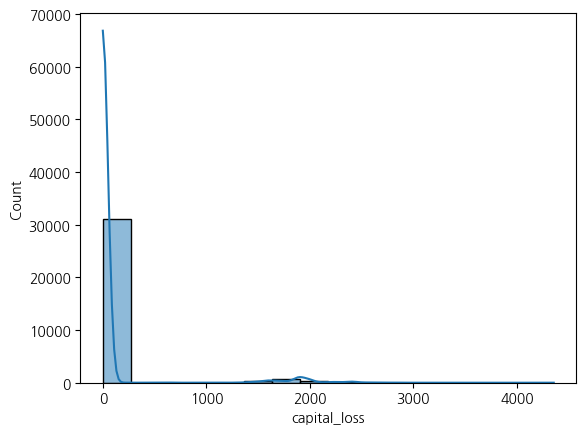

In [78]:
sns.histplot(data=data_df, x='capital_loss', kde=True)


In [91]:
non_zero_gain = data_df[data_df['capital_gain'] > 0]['capital_gain']
non_zero_gain.describe()

count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital_gain, dtype: float64

<Axes: xlabel='capital_gain', ylabel='Count'>

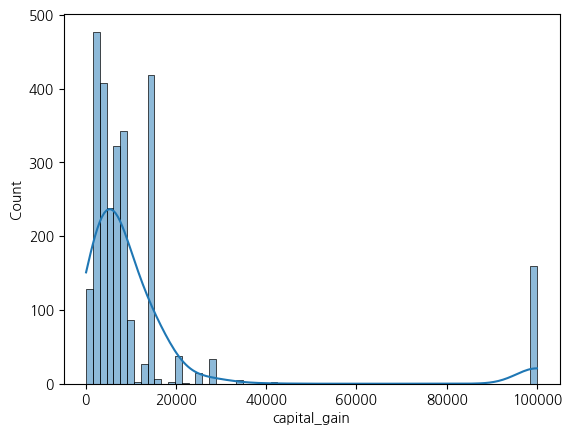

In [96]:
sns.histplot(non_zero_gain, kde=True)

In [93]:
non_zero_loss = data_df[data_df['capital_loss'] > 0]['capital_loss']
non_zero_loss.describe()

count    1519.000000
mean     1871.428571
std       376.571535
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital_loss, dtype: float64

<Axes: xlabel='capital_loss', ylabel='Count'>

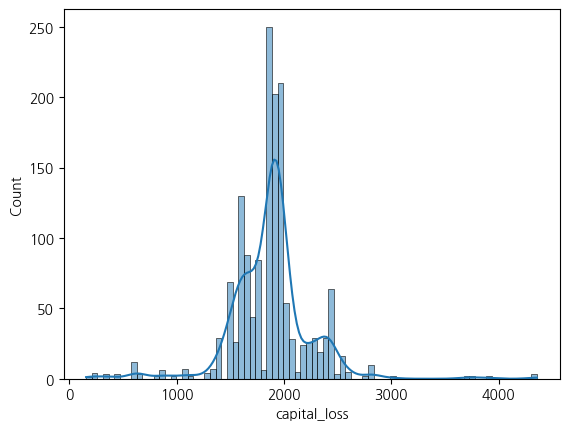

In [95]:
sns.histplot(non_zero_loss, kde=True)

In [ ]:
# capital_gain, capital_loss 는 0인 값이 너무 많아서 오히려 데이터의 특성을 보는 것을 어렵게 한다 
# 따라서 0인 레코드를 배제하고 분석해야 의미 있는 결과를 얻을 수 있을 것으로 보인다. 

2. 범주형 변수 처리
workclass 열에서 값의 분포를 출력하고, 고유값(unique value)의 개수를 확인하세요.
빈도수가 매우 낮은 범주를 Other로 병합하세요.

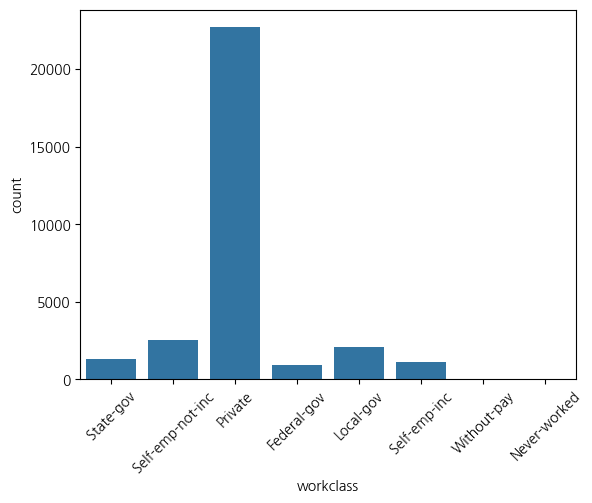

In [63]:
sns.countplot(data=data_df, x='workclass')
plt.xticks(rotation=45) 
plt.show()

In [64]:
data_df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [65]:
threshold = len(data_df) * 0.03  # 5% 임계값
value_counts = data_df['workclass'].value_counts()
small_categories = value_counts[value_counts < threshold].index
data_df['workclass_grouped'] = data_df['workclass'].apply(lambda x: 'Others' if x in small_categories else x)


In [66]:
data_df['workclass_grouped'].value_counts()


workclass_grouped
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Others                981
Name: count, dtype: int64

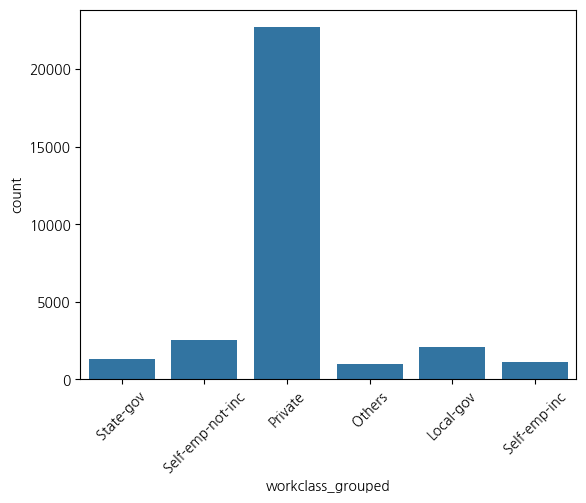

In [76]:
sns.countplot(data=data_df, x='workclass_grouped')
plt.xticks(rotation=45) 
plt.show()

native_country 열에서 상위 5개의 빈도가 높은 국가를 추출하고, 나머지 국가를 Other로 그룹화하세요.

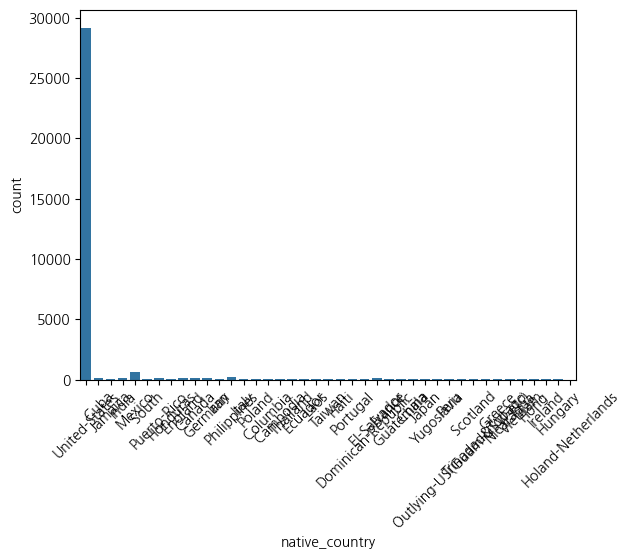

In [74]:
sns.countplot(data=data_df, x='native_country')
plt.xticks(rotation=45) 
plt.show()

In [67]:
data_df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [68]:
threshold = data_df['native_country'].value_counts()[4]
value_counts = data_df['native_country'].value_counts()
small_categories = value_counts[value_counts < threshold].index
data_df['native_country_grouped'] = data_df['native_country'].apply(lambda x: 'Others' if x in small_categories else x)


/tmp/ipykernel_40238/125753174.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  threshold = data_df['native_country'].value_counts()[4]


In [69]:
data_df['native_country_grouped'].value_counts()

native_country_grouped
United-States    29170
Others            1709
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: count, dtype: int64

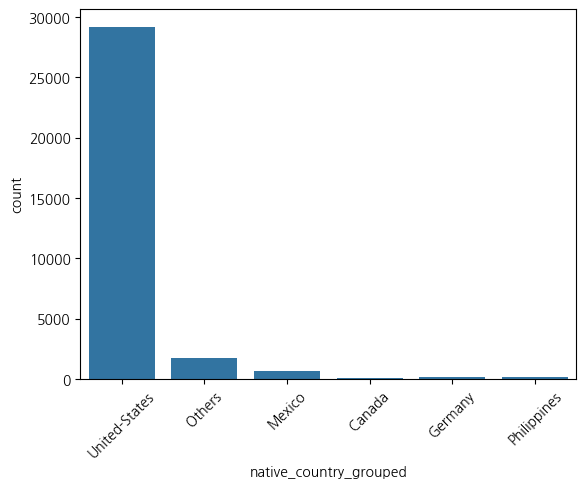

In [75]:
sns.countplot(data=data_df, x='native_country_grouped')
plt.xticks(rotation=45) 
plt.show()

education 열과 education_num 열의 관계를 탐구하세요.
두 열이 동일한 정보를 나타내는지 확인하고, 필요하다면 둘 중 하나를 제거하세요.

In [70]:
# 방법 2: merge 사용
edu_counts = data_df['education'].value_counts().reset_index()
edu_num_counts = data_df['education_num'].value_counts().reset_index()

edu_counts.columns = ['education', 'edu_freq']
edu_num_counts.columns = ['education_num', 'edu_num_freq']

# 1:1 매핑 확인을 위한 더 나은 방법
unique_pairs = data_df[['education', 'education_num']].drop_duplicates().sort_values('education_num')
result = pd.merge(unique_pairs, edu_counts, on='education')
result = pd.merge(result, edu_num_counts, on='education_num')

print("\n교육수준과 숫자의 매핑 및 빈도:")
print(result)


교육수준과 숫자의 매핑 및 빈도:
       education  education_num  edu_freq  edu_num_freq
0      Preschool              1        51            51
1        1st-4th              2       168           168
2        5th-6th              3       333           333
3        7th-8th              4       646           646
4            9th              5       514           514
5           10th              6       933           933
6           11th              7      1175          1175
7           12th              8       433           433
8        HS-grad              9     10501         10501
9   Some-college             10      7291          7291
10     Assoc-voc             11      1382          1382
11    Assoc-acdm             12      1067          1067
12     Bachelors             13      5355          5355
13       Masters             14      1723          1723
14   Prof-school             15       576           576
15     Doctorate             16       413           413


3. 데이터 변환 및 인코딩
income 열을 이진(binary) 변수로 변환하세요.
<=50K를 0으로, >50K를 1로 변환합니다.

In [71]:
data_df["income"].describe(include='object')


count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object

In [72]:
data_df['income'] = data_df['income'].map({"<=50K": 0, ">50K": 1})

In [73]:
data_df["income"].describe()

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [100]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
print("\n구간별 근무시간 분포:")
print(pd.cut(data_df['hours_per_week'], bins=bins).value_counts().sort_index())



구간별 근무시간 분포:
hours_per_week
(0, 20]       2928
(20, 40]     20052
(40, 60]      8471
(60, 80]       902
(80, 100]      208
Name: count, dtype: int64


In [101]:
print(data_df['occupation'].unique())


['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
